In [0]:
# This code is to train a model to classify the upper limb parts.

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [5]:
# Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches)
train_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(
    test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 32003 images belonging to 7 classes.
Found 4001 images belonging to 7 classes.
Found 4001 images belonging to 7 classes.


In [7]:
#Set the model to be = MobileNet with trained weights transfered.
mobile = keras.applications.mobilenet.MobileNet()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#Check the model structure
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [6]:
# Modify the structure by removing the last 5 layers 
# and then adding and dense layer as an output with
# 7 neurons and softmax activation
x = mobile.layers[-6].output
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=predictions)

In [7]:
# verify changes
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [8]:
# Confusion matrix function
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
# This cell and the one below is to control which 
# layers to be freezed and which to be trained
for layer in model.layers[:]:
    layer.trainable = True

In [10]:
for layer in model.layers[:-6]:
    layer.trainable = False

In [18]:
# compile the model
model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# start training
model.fit_generator(train_batches, steps_per_epoch=163, 
                    validation_data=valid_batches, validation_steps=10, epochs=30, verbose=2)


Epoch 1/30
 - 10s - loss: 0.4802 - acc: 0.8730 - val_loss: 0.5832 - val_acc: 0.8800
Epoch 2/30
 - 8s - loss: 0.3077 - acc: 0.9123 - val_loss: 0.6185 - val_acc: 0.8400
Epoch 3/30
 - 8s - loss: 0.3422 - acc: 0.9018 - val_loss: 0.4676 - val_acc: 0.9000
Epoch 4/30
 - 8s - loss: 0.2293 - acc: 0.9356 - val_loss: 0.2063 - val_acc: 0.9600
Epoch 5/30
 - 8s - loss: 0.2616 - acc: 0.9294 - val_loss: 0.4740 - val_acc: 0.8900
Epoch 6/30
 - 8s - loss: 0.2223 - acc: 0.9286 - val_loss: 0.3307 - val_acc: 0.9000
Epoch 7/30
 - 8s - loss: 0.2250 - acc: 0.9350 - val_loss: 0.4515 - val_acc: 0.9100
Epoch 8/30
 - 8s - loss: 0.1589 - acc: 0.9521 - val_loss: 0.0723 - val_acc: 0.9700
Epoch 9/30
 - 8s - loss: 0.1641 - acc: 0.9491 - val_loss: 0.2995 - val_acc: 0.8900
Epoch 10/30
 - 8s - loss: 0.1978 - acc: 0.9362 - val_loss: 0.1780 - val_acc: 0.9600
Epoch 11/30
 - 8s - loss: 0.1806 - acc: 0.9479 - val_loss: 0.3476 - val_acc: 0.9200
Epoch 12/30
 - 8s - loss: 0.1629 - acc: 0.9558 - val_loss: 0.0905 - val_acc: 0.9500


In [20]:
# Get the labels
test_labels = test_batches.classes

In [21]:
# Check the labels
test_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [22]:
# check the labels with thier indices
test_batches.class_indices

{'XR_ELBOW': 0,
 'XR_FINGER': 1,
 'XR_FOREARM': 2,
 'XR_HAND': 3,
 'XR_HUMERUS': 4,
 'XR_SHOULDER': 5,
 'XR_WRIST': 6}

In [23]:
# Test the model on the test set
predictions = model.predict_generator(test_batches, steps=401, verbose=0)

In [24]:
# Prepare the confusion matrix
cm = confusion_matrix(test_labels, predictions.argmax(axis=1))

Confusion matrix, without normalization
[[535   2   0   0   0   3   0]
 [  6 535   1   7   3   0   5]
 [ 38   0 157   1  10   0   7]
 [  1  24   0 575   0   0   0]
 [ 11   0   0   0 137   8   0]
 [  5   0   0   0   4 885   0]
 [ 10   7   4  16   1   4 999]]


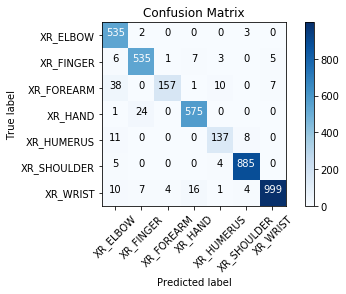

In [26]:
# show the confusion matrix
cm_plot_labels = ['XR_ELBOW','XR_FINGER','XR_FOREARM','XR_HAND','XR_HUMERUS','XR_SHOULDER','XR_WRIST']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [9]:
# The overall accuracy of the model
(cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]+cm[6][6])*100/sum(cm)

0.9555111222194451

In [28]:
# Save the model weights and structure
model.save_weights("models/modelMN_ULC.h5")
with open('models/model_architecture_ULC.json', 'w') as f:
    f.write(model.to_json())